# Ejercicio 5

## 1) 
Crea una función a la que se le pase como input: la media en el eje x, la media en el eje y, la varianza
en el eje x, la varianza en el eje y y la covarianza de x e y, junto con un número de puntos N, y
devuelva una matriz con N filas y 2 columnas con los números que salen de la distribución gaussiana
de dos dimensiones definidas por los valores de input (usar la función MASS::mvrnorm)

In [1]:
generaGauss2D = function(N, mu1, mu2, sigma1, sigma2, cov12){
  mu = c(mu1, mu2)
  sigma = matrix(c(sigma1*sigma1, cov12, cov12, sigma2*sigma2), nrow = 2, ncol = 2)
  return(MASS::mvrnorm(n = N, mu, Sigma = sigma))
}

## 2)
Genera una matrix x1 usando la función anterior y tomando: N = 1000, mu_x = 2, mu_y = 4, var_x =
var_y = 1, y Cov(x,y) = 0.3. Crea una matriz “y1” con tantas filas como la matriz x y asígnale el valor 0.

Como $var_x = 1$, entonces $\sigma_x = \sigma_y = sqrt(var_x) = 1$ también, por lo que trabajamos con $\sigma$

In [2]:
N = 1000
mux1 = 2
muy1 = 4
sigmax1 = sigmay1 = 1
cov1 = 0.3

x1 = generaGauss2D(N, mux1, muy1, sigmax1, sigmay1, cov1)
y1 = rep(0, N)

## 3) 
Repite 2) para otra muestra con N = 1000, mu_x = 6, mu_y = 3, var_x = var_y = 1, y Cov(x,y) = 0.3.
Crea una matriz “y2” con tantas filas como la matriz x2 y asígnale el valor 1.

In [3]:
mux2 = 6
muy2 = 3
sigmax2 = sigmay2 = 1
cov2 = 0.3

x2 = generaGauss2D(N, mux2, muy2, sigmax2, sigmay2, cov2)
y2 = rep(1, N)

## 4) 
Junta las matrices x1, x2, y y1, y2 en una sola matriz x y una sola matriz y.

In [4]:
dfx = rbind(x1, x2)
dfy = rbind(matrix(y1), matrix(y2))

## 5)
Usando las funciones de coste y gradiente del ejercicio 4, utiliza optim para un modelo en el que z =
alpha_0 + alpha_1 x1 + alpha_2 x2, tomando como vector de parámetros inicial el (0, 0, 0). Calcula y
pinta la frontera entre ambas distribuciones.

In [5]:
sigmoid = function(z){
  s = 1/(1+exp(-z))
  return(s)
}

In [6]:
loss = function(x, y, alpha){
    N = length(y)
    xMat = cbind(rep(1, N), x)

    Z = xMat %*% alpha 
    l = sum(y*log(sigmoid(Z)) + (1-y)*log(1 - sigmoid(Z)))
  return(-1/N * l)
}

In [7]:
grad_loss = function(x, y, alpha){
  N = length(y)
  xMat = cbind(rep(1, N), x)
  Z = xMat %*% alpha
  g = t(sigmoid(Z)- y) %*% xMat
  return(1/N * g)
}

In [8]:
length(dfy)

[1] 2000

In [9]:
alpha_ini = c(0,0,0)
opt = optim(par = alpha_ini, x = dfx, y = dfy, fn = loss, gr = grad_loss, method = "BFGS")
opt$par

[1] -12.682533   4.955737  -1.940690

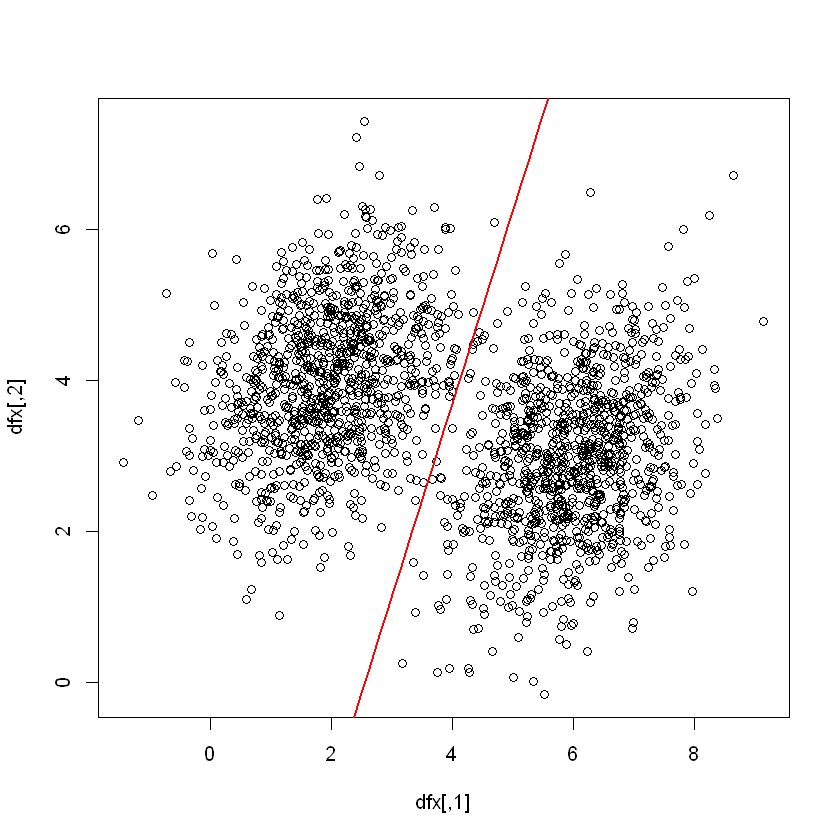

In [10]:
plot(dfx)
alpha = opt$par
curve(-alpha[1]/alpha[3]-(alpha[2]/alpha[3])*x,add=TRUE, col = "red", lwd = 2)

## 6)
Repite otra vez 1, 2, 3 y 4 para obtener otras matrices x e y independientes. Utilizando la “sigma”
calculada anteriormente calcula el TPR, TNR, FPR y FNR para valores del threshold = 0.3, 0.5, 0.7.

In [11]:
N = 1000
# Definimos la primera nube de puntos
mux1 = 2
muy1 = 4
sigmax1 = sigmay1 = 1
cov1 = 0.3

x1 = generaGauss2D(N, mux1, muy1, sigmax1, sigmay1, cov1)
y1 = rep(0, N)
# Definimos la segunda nube de puntos
mux2 = 6
muy2 = 3
sigmax2 = sigmay2 = 1
cov2 = 0.3

x2 = generaGauss2D(N, mux2, muy2, sigmax2, sigmay2, cov2)
y2 = rep(1, N)
# Juntamos en los dataframes
dfx2 = rbind(x1, x2)
dfy2 = rbind(matrix(y1), matrix(y2))

In [12]:
# Calculamos la sigmoide para cada par de puntos x1,x2, utilizando los parámetros alpha calculados
# en el apartado anterior
N = nrow(dfx2)
xMat = cbind(rep(1, N), dfx2)
Z = xMat %*% alpha
sigma = sigmoid(Z)

$\lambda = 0.3$

In [13]:
#Predicciones
ypred3 = matrix(data = NA, nrow = N, ncol = 1)
lambda = 0.3
ypred3[which(sigma>lambda)] = 1
ypred3[which(sigma<lambda)] = 0

In [14]:
# Calculamos la matriz de confusión
confmat3 = table(ypred3, dfy2)
confmat3
print(paste0("lambda = ", lambda))
#TPR
TPR3 = confmat3[1,1]/(confmat3[1,1]+confmat3[1,2])
print(paste0("TPR = ", TPR3))
#TNR
TNR3 = confmat3[2,2]/(confmat3[2,1]+confmat3[2,2])
print(paste0("TNR = ", TNR3))
#FPR
FPR3 = confmat3[1,2]/(confmat3[1,1]+confmat3[1,2])
print(paste0("FPR = ", FPR3))
#FNR
FNR3 = confmat3[2,1]/(confmat3[2,1]+confmat3[2,2])
print(paste0("FNR = ", FNR3))

      dfy2
ypred3   0   1
     0 979   4
     1  21 996

[1] "lambda = 0.3"
[1] "TPR = 0.995930824008138"
[1] "TNR = 0.979351032448378"
[1] "FPR = 0.00406917599186165"
[1] "FNR = 0.0206489675516224"


$\lambda = 0.5$

In [15]:
#Predicciones
ypred5 = matrix(data = NA, nrow = N, ncol = 1)
lambda = 0.5
ypred5[which(sigma>lambda)] = 1
ypred5[which(sigma<lambda)] = 0

In [16]:
# Calculamos la matriz de confusión
confmat5 = table(ypred5, dfy2)
confmat5
print(paste0("lambda = ", lambda))
#TPR
TPR5 = confmat5[1,1]/(confmat5[1,1]+confmat5[1,2])
print(paste0("TPR = ", TPR5))
#TNR
TNR5 = confmat5[2,2]/(confmat5[2,1]+confmat5[2,2])
print(paste0("TNR = ", TNR5))
#FPR
FPR5 = confmat5[1,2]/(confmat5[1,1]+confmat5[1,2])
print(paste0("FPR = ", FPR5))
#FNR
FNR5 = confmat5[2,1]/(confmat5[2,1]+confmat5[2,2])
print(paste0("FNR = ", FNR5))

      dfy2
ypred5   0   1
     0 985   7
     1  15 993

[1] "lambda = 0.5"
[1] "TPR = 0.992943548387097"
[1] "TNR = 0.985119047619048"
[1] "FPR = 0.00705645161290323"
[1] "FNR = 0.0148809523809524"


$\lambda = 0.7$

In [17]:
#Predicciones
ypred7 = matrix(data = NA, nrow = N, ncol = 1)
lambda = 0.7
ypred7[which(sigma>lambda)] = 1
ypred7[which(sigma<lambda)] = 0

In [18]:
# Calculamos la matriz de confusión
confmat7 = table(ypred7, dfy2)
confmat7
print(paste0("lambda = ", lambda))
#TPR
TPR7 = confmat7[1,1]/(confmat7[1,1]+confmat7[1,2])
print(paste0("TPR = ", TPR7))
#TNR
TNR7 = confmat7[2,2]/(confmat7[2,1]+confmat7[2,2])
print(paste0("TNR = ", TNR7))
#FPR
FPR7 = confmat7[1,2]/(confmat7[1,1]+confmat7[1,2])
print(paste0("FPR = ", FPR7))
#FNR
FNR7 = confmat7[2,1]/(confmat7[2,1]+confmat7[2,2])
print(paste0("FNR = ", FNR7))

      dfy2
ypred7   0   1
     0 991  10
     1   9 990

[1] "lambda = 0.7"
[1] "TPR = 0.99000999000999"
[1] "TNR = 0.990990990990991"
[1] "FPR = 0.00999000999000999"
[1] "FNR = 0.00900900900900901"


Como podemos observar, cuanto menor es el valor de $\lambda$ mejor predecimos el 0, pero cuanto mayor es $\lambda$ mejor predecimos el 1. El valor de $\lambda$ "óptimo" por así decirlo, con el que alcanzamos un compromiso, sería $\lambda=0.5$